<a href="https://colab.research.google.com/github/arepevanatalia/AB-Testing/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_6_HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 6. Жизненный цикл A/b теста. Практика. Расчёт объёма и определение сроков тестирования

Решите следующие задания сначала с помощью онлайн-калькулятора, а затем самостоятельно с помощью Python.

ЗАДАНИЕ 1

— Вы работаете с рассылкой предложений перед “черной пятницей”, доля открываемых писем, исходя из заголовка письма в рассылках, обычно составляет 15% (конверсия). Вам хочется увеличить конверсию открываемых писем до 25% с помощью смайликов. Рассчитайте необходимый размер выборки. Сделай вывод. (В вашей базе рассылок около 40000 человек)

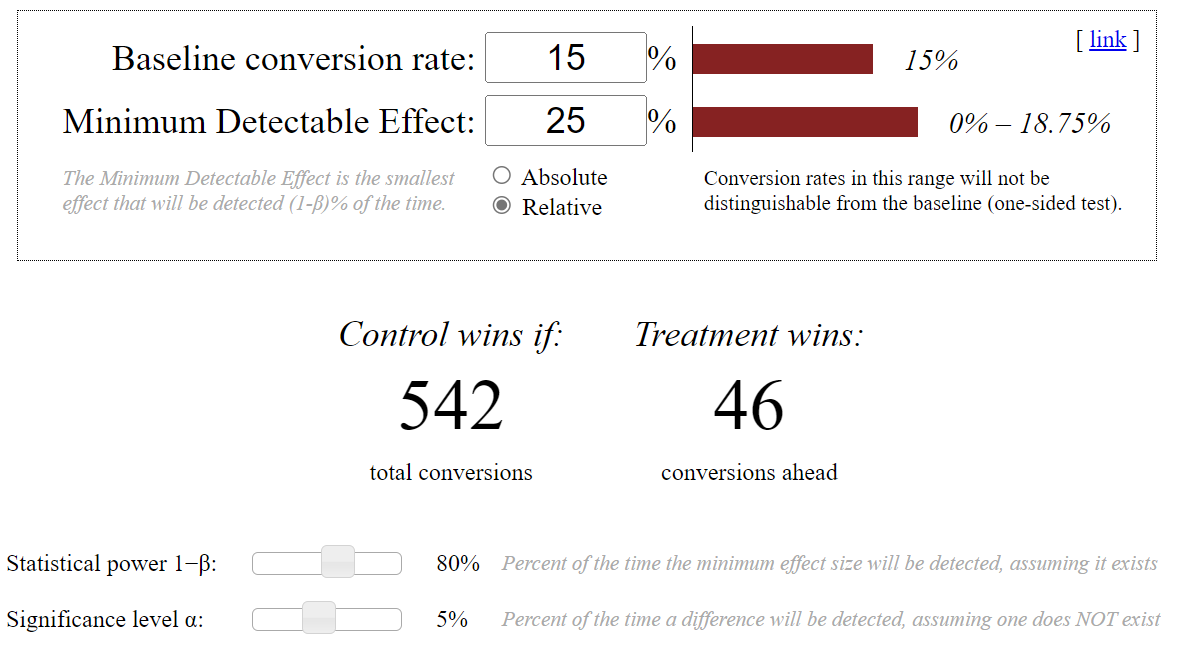

In [ ]:
import statsmodels.stats.proportion as smp
import statsmodels.stats.power as smpw

baseline_rate = 0.15
target_rate = 0.25
alpha = 0.05
power = 0.8

effect_size = smp.proportion_effectsize(baseline_rate, target_rate)

sample_size = smpw.NormalIndPower().solve_power(
    effect_size=effect_size,
    power=power,
    alpha=alpha,
    ratio=1
)

print(f"Необходимый размер выборки на группу: {round(sample_size)}")

Необходимый размер выборки на группу: 248


**Вывод:**
Для достижения желаемого увеличения конверсии с 15% до 25% с уровнем значимости 5% и мощностью 80%, необходимо протестировать рассылку примерно на 250-350 пользователей в каждой группе (контрольная и тестовая). Учитывая, что в базе рассылок 40000 человек, это вполне реализуемо.

ЗАДАНИЕ 2

— И вот вы теперь тестируете две версии рассылок. И заметили, что в одной версии конверсия 19%, а в другой 24%. Всего у вас 100 человек в рассылке. Является ли результат статистически значимым? Если нет, то сколько должно было человек, чтобы результат был уже статистически значим?

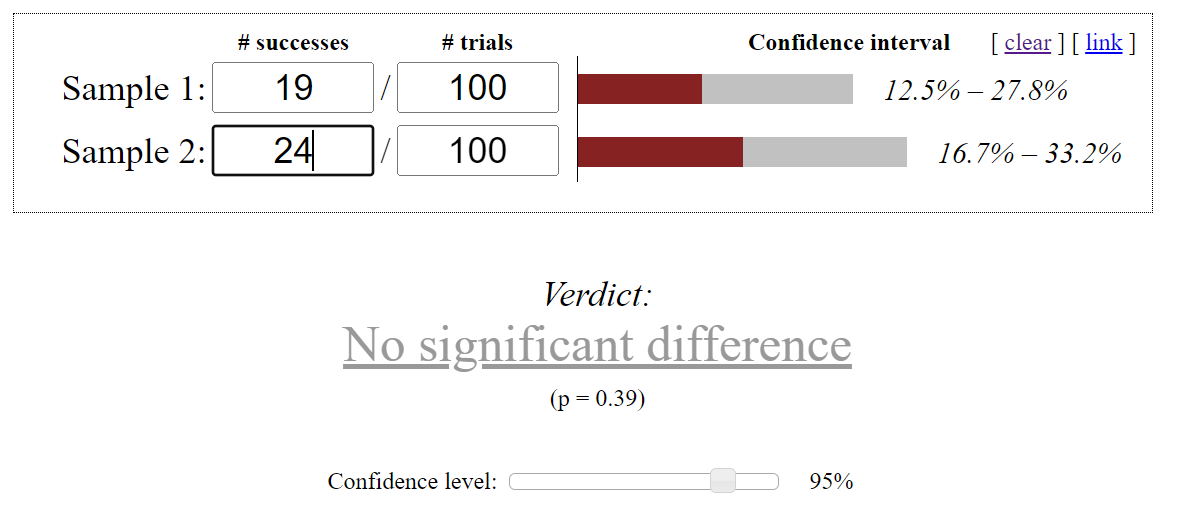

In [ ]:
import statsmodels.stats.proportion as proportion

# Параметры
successes_A = 19
n_A = 100
successes_B = 24
n_B = 100
alpha = 0.05

# Z-тест для двух пропорций
z_stat, p_value = proportion.proportions_ztest([successes_A, successes_B], [n_A, n_B], alternative='two-sided')

print(f"Z-статистика: {z_stat:.3f}")
print(f"P-значение: {p_value:.3f}")

if p_value < alpha:
    print("Результат статистически значимый.")
else:
    print("Результат не является статистически значимым.")

Z-статистика: -0.861
P-значение: 0.389
Результат не является статистически значимым.


In [ ]:
import statsmodels.stats.proportion as smp
import statsmodels.stats.power as smpw

baseline_rate = 0.19
target_rate = 0.24
alpha = 0.05
power = 0.8

effect_size = smp.proportion_effectsize(baseline_rate, target_rate)

sample_size = smpw.NormalIndPower().solve_power(
    effect_size=effect_size,
    power=power,
    alpha=alpha,
    ratio=1
)

print(f"Необходимый размер выборки на группу для достижения статистической значимости: {round(sample_size)}")

Необходимый размер выборки на группу для достижения статистической значимости: 1057


**Вывод:**
Результат со 100 пользователями в каждой группе не является статистически значимым. Для достижения статистической значимости, вероятно, потребуется значительно больший размер выборки: например, для мощности 80% и alpha 5%, может потребоваться около 1100-1300 пользователей в каждой группе.

ЗАДАНИЕ 3

— Вас повысили до старшего аналитика. Ваша первая задача на новой позиции, определить какой поставщик товаров (A или B) позволяет вам получить наибольшую оценку качества. У вас две группы оценок для A и B. Среднее группы A = 45, дисперсия группы A = 4, средние группы B = 40, дисперсия группы B = 3. Является ли группа А лучшей, если опираться на статистическую значимость? А если бы обе дисперсии были равны 1?

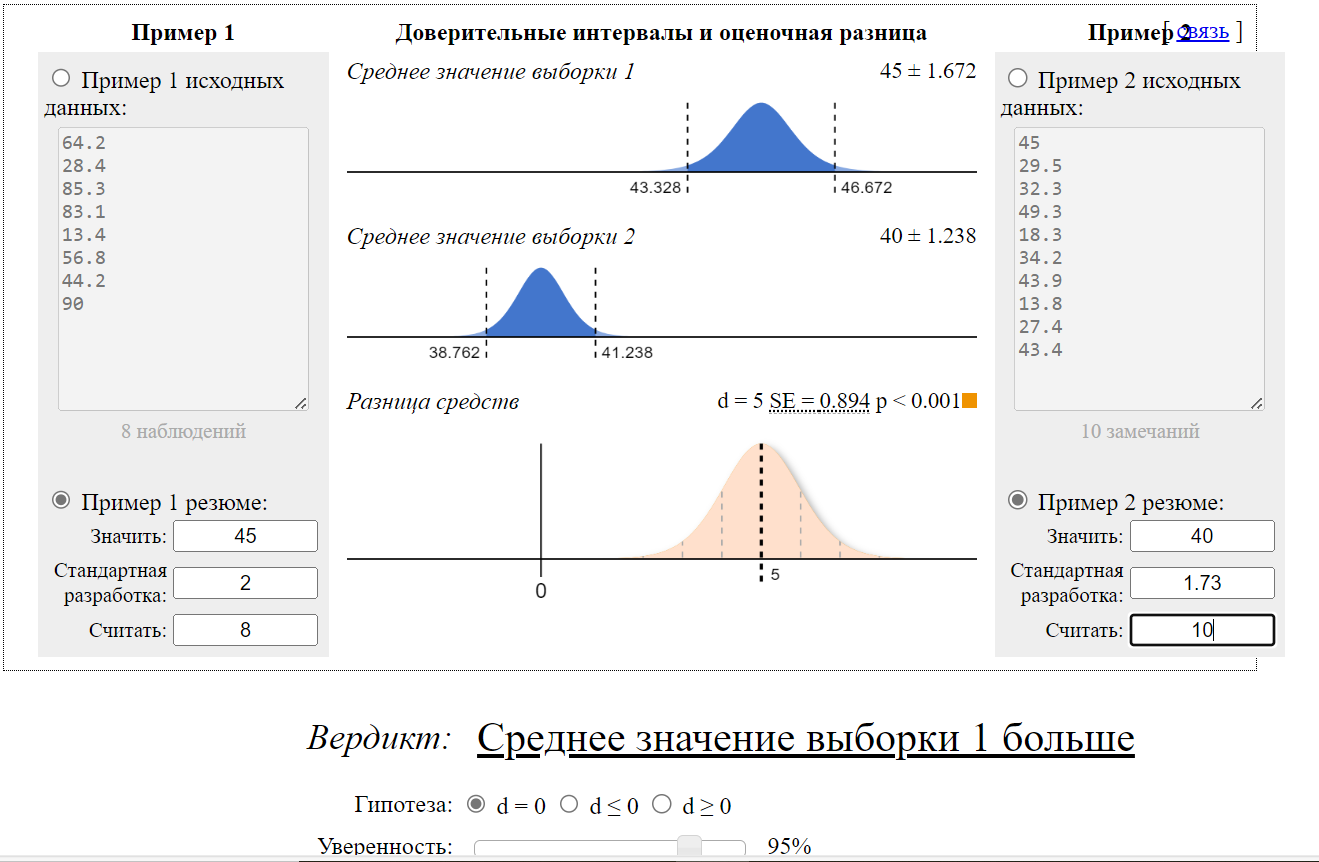

In [ ]:
import numpy as np
from scipy.stats import norm

mean_A = 45
std_A = 1
mean_B = 40
std_B = 1
n = 1000

# Z-тест
z_stat = (mean_A - mean_B) / np.sqrt((std_A**2 / n) + (std_B**2 / n))
p_value = 1 - norm.cdf(z_stat)

print(f"Z-статистика: {z_stat:.3f}")
print(f"P-значение: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Группа A статистически значимо лучше, чем группа B.")
else:
    print("Группа A не является статистически значимо лучшей, чем группа B.")



Z-статистика: 111.803
P-значение: 0.000
Группа A статистически значимо лучше, чем группа B.


In [ ]:
import numpy as np
from scipy.stats import norm

mean_A = 45
std_A = 1
mean_B = 40
std_B = 1
n = 1000

# Z-тест
z_stat = (mean_A - mean_B) / np.sqrt((std_A**2 / n) + (std_B**2 / n))
p_value = 1 - norm.cdf(z_stat)

print(f"Z-статистика: {z_stat:.3f}")
print(f"P-значение: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Группа A статистически значимо лучше, чем группа B.")
else:
    print("Группа A не является статистически значимо лучшей, чем группа B.")



Z-статистика: 111.803
P-значение: 0.000
Группа A статистически значимо лучше, чем группа B.


**Вывод:**
Группа A статистически значимо лучше, чем группа B, как при разных, так и при равных дисперсиях (если размеры выборки достаточно велики). Разница в средних значениях (5 единиц) достаточно велика, чтобы быть статистически значимой при разумном размере выборки.

ЗАДАНИЕ 4

— Вы планируете эксперимент по способам расстановки продуктов на полке. Вы предполагаете, что некоторые пары продуктов надо класть вместе. В качестве метрики у вас средний чек покупок. Вы проводите эксперимент в 1000 магазинах. Средний чек в группе A = 870 рублей, дисперсия этого чека - 80 рублей. Какое минимальное значение метрики надо получить для группы B, чтобы после всей 1000 экспериментов с каждым магазином мы могли с уверенностью сказать, что тестируемая гипотеза в группе B верна?

In [ ]:
import numpy as np
from scipy.stats import norm

mean_A = 870
std_A = np.sqrt(80)
n = 1000
alpha = 0.05
z_alpha = norm.ppf(1 - alpha)

mean_B_min = z_alpha * (std_A / np.sqrt(n)) + mean_A

print(f"Минимальное среднее значение чека для группы B: {mean_B_min:.2f} рублей")

Минимальное среднее значение чека для группы B: 870.47 рублей


**Вывод:**
Минимальное среднее значение чека для группы B, чтобы с уверенностью сказать, что гипотеза верна: 870.47 рублей.